# APPLICATION OF MACHINE LEARNING FOR DNS TUNNELING DETECTION

## What is DNS?

- The Domain Name System (DNS), 
- resolve human readable hostnames into machine readable IP Addresses,
- When you visit a domain such as “Flipkart.com”, your computer follows a series of steps to turn the human readable web address into a machine readable IP address 143.22.32.11

## DNS TUNNELING

DNS tunnelling is a method used by malicious users who intend to bypass the security gateway to send or receive commands and data. This has a significant impact on revealing or releasing classified information. Taking advantage of the machine learning techniques capabilities, this research aims to adopt a binary classification in order to handle the problem of classifying DNS tunnel which will identify whether the DNS request is either legitimate or tunnelling

### 1. Load the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
from pycaret.classification import *

/home/dhiraj/Dhiraj/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/dhiraj/Dhiraj/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


### 2. Exploring the tunneling dataset

In [3]:
df=pd.read_csv("Tunnelling_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

In [4]:
df=df.drop(3,axis=1)

In [5]:
df=df.rename(columns={0:"Timestamp",1:"Protocol",2:"Source_IP",4:"Destination_IP",5:"Identification_no",6:"DNS_type",7:"DNS_info",8:"DNS_Response_Len"})

In [6]:
df.insert(8,"Lable","Tunnel",True)

In [7]:
df.DNS_type.unique()

array(['CNAME?', 'CNAME', 'PTR?', 'NXDomain', 'TXT?', 'TXT', 'PTR', 'MX?',
       'A?', 'AAAA?', nan], dtype=object)

In [8]:
df.DNS_info.unique()

array(['dnscat.60d201f876f3ac26f0d131003afbac0ee3.',
       'dnscat.acb201f876cc2d09230bd1ffff199bc5d2.',
       '13.3.168.192.in-addr.arpa.', ...,
       'f76901caff46d4a045bb900120859005b2.chalu.com.',
       'f56501caffb73919a61c30ffffd1f93552',
       'f93101caff39da0f3fe40601192ea2a545.chalu.com.'], dtype=object)

In [9]:
df.Lable.unique()

array(['Tunnel'], dtype=object)

In [10]:
df.DNS_Response_Len.unique()

array(['(59)', '(114)', '(43)', '(44)', '(106)', '(38)', '(62)', '(47)',
       '(307)', '(310)', nan, '(152)', '(142)', '(297)', '(238)', '(109)',
       '(120)', '(271)', '(255)', '(313)', '(215)', '(273)', '(78)',
       '(264)', '(125)', '(144)', '(32)'], dtype=object)

In [11]:
df

Timestamp Protocol            Source_IP        Destination_IP  \
0      18:58:15.801177       IP  192.168.3.136.51531  192.168.3.13.domain:   
1      18:58:15.802048       IP  192.168.3.13.domain  192.168.3.136.51531:   
2      18:58:16.197885       IP   192.168.3.13.39576    dns.google.domain:   
3      18:58:16.210500       IP    dns.google.domain   192.168.3.13.39576:   
4      18:58:16.210722       IP   192.168.3.13.34517    dns.google.domain:   
...                ...      ...                  ...                   ...   
12060  19:24:19.917524       IP  192.168.3.136.55198  192.168.3.13.domain:   
12061  19:24:19.918503       IP  192.168.3.13.domain  192.168.3.136.55198:   
12062  19:24:20.922298       IP  192.168.3.136.55198  192.168.3.13.domain:   
12063  19:24:12.883130       IP  192.168.3.13.domain  192.168.3.136.55198:   
12064  19:24:13.887213       IP  192.168.3.136.55198  192.168.3.13.domain:   

      Identification_no  DNS_type  \
0                45828+    CNAME?   
1                 45828     CNAME   
2                21832+      PTR?   
3                 21832  NXDomain   
4                37842+      PTR?   
...                 ...       ...   
12060             1576+      TXT?   
12061              1576       TXT   
12062            24481+       MX?   
12063             41349       TXT   
12064            27462+       MX?   

                                            DNS_info DNS_Response_Len   Lable  
0         dnscat.60d201f876f3ac26f0d131003afbac0ee3.             (59)  Tunnel  
1         dnscat.acb201f876cc2d09230bd1ffff199bc5d2.            (114)  Tunnel  
2                         13.3.168.192.in-addr.arpa.             (43)  Tunnel  
3                                              0/0/0             (43)  Tunnel  
4                        136.3.168.192.in-addr.arpa.             (44)  Tunnel  
...                                              ...              ...     ...  
12060  fb2f01caff1cd77d86273d011fa86acf54.chalu.com.             (62)  Tunnel  
12061             9aeb01caffc7b2bf4641b8ffffd1f93552            (109)  Tunnel  
12062  f76901caff46d4a045bb900120859005b2.chalu.com.             (62)  Tunnel  
12063             f56501caffb73919a61c30ffffd1f93552            (109)  Tunnel  
12064  f93101caff39da0f3fe40601192ea2a545.chalu.com.             (62)  Tunnel  

[12065 rows x 9 columns]

### 3. Data preparation

In [12]:
df[df.isnull().any(axis=1)]

Timestamp  Protocol Source_IP Destination_IP Identification_no DNS_type  \
9613     'A?',  'AAAA?',    'MX'],             10             (309)      NaN   

     DNS_info DNS_Response_Len   Lable  
9613      NaN              NaN  Tunnel

In [13]:
df=df.drop(9613)

In [14]:
df

Timestamp Protocol            Source_IP        Destination_IP  \
0      18:58:15.801177       IP  192.168.3.136.51531  192.168.3.13.domain:   
1      18:58:15.802048       IP  192.168.3.13.domain  192.168.3.136.51531:   
2      18:58:16.197885       IP   192.168.3.13.39576    dns.google.domain:   
3      18:58:16.210500       IP    dns.google.domain   192.168.3.13.39576:   
4      18:58:16.210722       IP   192.168.3.13.34517    dns.google.domain:   
...                ...      ...                  ...                   ...   
12060  19:24:19.917524       IP  192.168.3.136.55198  192.168.3.13.domain:   
12061  19:24:19.918503       IP  192.168.3.13.domain  192.168.3.136.55198:   
12062  19:24:20.922298       IP  192.168.3.136.55198  192.168.3.13.domain:   
12063  19:24:12.883130       IP  192.168.3.13.domain  192.168.3.136.55198:   
12064  19:24:13.887213       IP  192.168.3.136.55198  192.168.3.13.domain:   

      Identification_no  DNS_type  \
0                45828+    CNAME?   
1                 45828     CNAME   
2                21832+      PTR?   
3                 21832  NXDomain   
4                37842+      PTR?   
...                 ...       ...   
12060             1576+      TXT?   
12061              1576       TXT   
12062            24481+       MX?   
12063             41349       TXT   
12064            27462+       MX?   

                                            DNS_info DNS_Response_Len   Lable  
0         dnscat.60d201f876f3ac26f0d131003afbac0ee3.             (59)  Tunnel  
1         dnscat.acb201f876cc2d09230bd1ffff199bc5d2.            (114)  Tunnel  
2                         13.3.168.192.in-addr.arpa.             (43)  Tunnel  
3                                              0/0/0             (43)  Tunnel  
4                        136.3.168.192.in-addr.arpa.             (44)  Tunnel  
...                                              ...              ...     ...  
12060  fb2f01caff1cd77d86273d011fa86acf54.chalu.com.             (62)  Tunnel  
12061             9aeb01caffc7b2bf4641b8ffffd1f93552            (109)  Tunnel  
12062  f76901caff46d4a045bb900120859005b2.chalu.com.             (62)  Tunnel  
12063             f56501caffb73919a61c30ffffd1f93552            (109)  Tunnel  
12064  f93101caff39da0f3fe40601192ea2a545.chalu.com.             (62)  Tunnel  

[12064 rows x 9 columns]

In [15]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Timestamp, Protocol, Source_IP, Destination_IP, Identification_no, DNS_type, DNS_info, DNS_Response_Len, Lable]
Index: []

In [16]:
df['DNS_Response_Len'] = df['DNS_Response_Len'].str.extract(r'\((\d+)\)').astype(int)

In [17]:
values_to_drop = ['NXDomain']
df = df[~df['DNS_type'].isin(values_to_drop)]

In [18]:
for i  in df.columns:
    print(i,df[i].unique())
    print("")

Timestamp ['18:58:15.801177' '18:58:15.802048' '18:58:16.197885' ...
 '19:24:20.922298' '19:24:12.883130' '19:24:13.887213']

Protocol ['IP']

Source_IP ['192.168.3.136.51531' '192.168.3.13.domain' '192.168.3.13.39576'
 '192.168.3.13.34517' '192.168.3.13.33344' 'dns.google.domain'
 '192.168.3.13.36996' '192.168.3.13.58351' '192.168.3.13.38728'
 '192.168.3.13.37652' '192.168.3.13.50051' '192.168.3.13.56505'
 '192.168.3.13.42041' '192.168.3.13.52168' '192.168.3.13.34493'
 '192.168.3.13.48307' '192.168.3.13.52976' '192.168.3.13.38087'
 '192.168.3.13.46666' '192.168.3.136.55198' '192.168.3.13.44616'
 '192.168.3.13.35040' '192.168.3.13.41807' '192.168.3.13.45445'
 '192.168.3.13.57502' '192.168.3.13.48921' '192.168.3.13.50257'
 '192.168.3.13.49528']

Destination_IP ['192.168.3.13.domain:' '192.168.3.136.51531:' 'dns.google.domain:'
 '192.168.3.13.33344:' '192.168.3.136.55198:' '192.168.3.13.41807:']

Identification_no ['45828+' '45828' '21832+' ... '24481+' '41349' '27462+']

DNS_type ['CNAM

In [19]:
df.shape

(12060, 9)

### 4. Exploring the Normal dataset

In [20]:
df1=pd.read_csv("Legitimate_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

In [21]:
df1=df1.drop(3,axis=1)

In [22]:
df1=df1.rename(columns={0:"Timestamp",1:"Protocol",2:"Source_IP",4:"Destination_IP",5:"Identification_no",6:"DNS_type",7:"DNS_info",8:"DNS_Response_Len"})

In [23]:
df1.insert(8,"Lable","Normal",True)

In [24]:
df1.shape

(53410, 9)

### 5. Data preparation

In [25]:
df1[df1.isnull().any(axis=1)]

Timestamp Protocol            Source_IP         Destination_IP  \
21     15:13:39.217406       IP    dns.google.domain  192.168.86.206.48148:   
34     15:13:39.899945       IP    dns.google.domain  192.168.86.206.49334:   
44     15:13:40.289727       IP    dns.google.domain  192.168.86.206.48657:   
61     15:13:41.355336       IP    dns.google.domain  192.168.86.206.40021:   
65     15:13:41.471425       IP    dns.google.domain  192.168.86.206.51119:   
...                ...      ...                  ...                    ...   
53391  17:31:03.824816       IP    dns.google.domain    192.168.3.13.41600:   
53395  17:31:04.391687       IP    dns.google.domain    192.168.3.13.37532:   
53399  17:31:04.527267       IP    dns.google.domain    192.168.3.13.35508:   
53401  17:31:04.591208       IP    dns.google.domain    192.168.3.13.37190:   
53406  17:31:04.677942       IP  192.168.3.132.50917  239.255.255.250.1900:   

      Identification_no  DNS_type DNS_info DNS_Response_Len   Lable  
21                29452      (94)      NaN              NaN  Normal  
34                14055      (86)      NaN              NaN  Normal  
44                18844  NXDomain    (178)              NaN  Normal  
61                58912      (97)      NaN              NaN  Normal  
65                44134      (87)      NaN              NaN  Normal  
...                 ...       ...      ...              ...     ...  
53391             26612      (94)      NaN              NaN  Normal  
53395             42171  NXDomain    (123)              NaN  Normal  
53399             30501     (119)      NaN              NaN  Normal  
53401             28557  NXDomain    (127)              NaN  Normal  
53406              UDP,    length      173              NaN  Normal  

[15265 rows x 9 columns]

In [26]:
df1.dropna(inplace=True)

In [27]:
df1.shape

(38145, 9)

In [28]:
df1

Timestamp Protocol             Source_IP         Destination_IP  \
0      15:13:36.199943       IP  192.168.86.206.47531     dns.google.domain:   
1      15:13:36.199974       IP  192.168.86.206.47531     dns.google.domain:   
2      15:13:36.642533       IP  192.168.86.206.50269     dns.google.domain:   
3      15:13:36.708036       IP     dns.google.domain  192.168.86.206.50269:   
4      15:13:36.708398       IP  192.168.86.206.47035     dns.google.domain:   
...                ...      ...                   ...                    ...   
53404  17:31:04.633961       IP     dns.google.domain    192.168.3.13.44233:   
53405  17:31:04.634156       IP    192.168.3.13.56824     dns.google.domain:   
53407  17:31:04.694286       IP    192.168.3.13.40391     dns.google.domain:   
53408  17:31:04.759541       IP    192.168.3.13.57563     dns.google.domain:   
53409  17:31:04.800526       IP    192.168.3.13.36308     dns.google.domain:   

      Identification_no DNS_type                        DNS_info  \
0                 2966+       A?  connectivity-check.ubuntu.com.   
1                24491+    AAAA?  connectivity-check.ubuntu.com.   
2                49758+     PTR?           8.8.8.8.in-addr.arpa.   
3                 49758      PTR                     dns.google.   
4                16199+     PTR?    206.86.168.192.in-addr.arpa.   
...                 ...      ...                             ...   
53404             22602     AAAA         2406:2000:e4:1605::1000   
53405            58203+       A?          a1822.dscd.akamai.net.   
53407            46977+    AAAA?          a1822.dscd.akamai.net.   
53408            36745+       A?              intg.snapchat.com.   
53409            15147+    AAAA?   d889emgu1evay.cloudfront.net.   

      DNS_Response_Len   Lable  
0                 (47)  Normal  
1                 (47)  Normal  
2                 (38)  Normal  
3                 (62)  Normal  
4                 (45)  Normal  
...                ...     ...  
53404             (85)  Normal  
53405             (39)  Normal  
53407             (39)  Normal  
53408             (35)  Normal  
53409             (46)  Normal  

[38145 rows x 9 columns]

In [29]:
df1.DNS_Response_Len.isnull().sum()

0

In [30]:
df1.duplicated().sum()

0

In [31]:
df1.Protocol.unique()

array(['IP', 'ARP,'], dtype=object)

In [32]:
for i in df1.columns:
    print(i,df1[i].unique()) 
    print("")


Timestamp ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protocol ['IP' 'ARP,']

Source_IP ['192.168.86.206.47531' '192.168.86.206.50269' 'dns.google.domain' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Destination_IP ['dns.google.domain:' '192.168.86.206.50269:' '192.168.86.206.47035:' ...
 '192.168.3.13.58213:' '192.168.3.13.52403:' '192.168.3.13.44233:']

Identification_no ['2966+' '24491+' '49758+' ... '58203+' '46977+' '15147+']

DNS_type ['A?' 'AAAA?' 'PTR?' 'PTR' 'NXDomain' 'A' 'AAAA' '192.168.86.206,'
 '192.168.86.89,' 'ServFail' 'CNAME' 'Reply,' 'Client,' 'Server,'
 '192.168.3.116,' '192.168.3.138,' '192.168.3.13,' '192.168.3.109,'
 '192.168.3.104,' '192.168.3.115,' '192.168.3.103,' '192.168.3.102,'
 '192.168.3.147,' '192.168.3.120,']

DNS_info ['connectivity-check.ubuntu.com.' '8.8.8.8.in-addr.arpa.' 'dns.google.'
 ... '2406:2000:e4:1605::1000' 'intg.snapchat.com.'
 'd889emgu1evay.cl

### converting data type

- DNS_Response_Len Column data types is a object as it's value was enclosed in the parentheses "( )" but for anylasis we need that value data type in int. 

In [33]:
df1[df1.DNS_Response_Len=="48"].replace(to_replace="48",value="(48)")

Timestamp Protocol                 Source_IP  \
3281   15:24:19.329092       IP      192.168.86.206.58481   
3283   15:24:19.719665       IP  alphyn.canonical.com.ntp   
3668   16:49:21.407293       IP        192.168.3.13.49064   
3940   16:49:31.609968       IP        192.168.3.13.47405   
4177   16:49:41.859900       IP        192.168.3.13.49969   
4486   16:49:52.109885       IP        192.168.3.13.48715   
4829   16:50:02.360078       IP        192.168.3.13.43160   
10300  16:54:28.894992       IP        192.168.3.13.51704   
10382  16:54:39.109942       IP        192.168.3.13.42613   
10576  16:54:49.359850       IP        192.168.3.13.42841   
10601  16:54:59.610062       IP        192.168.3.13.38391   
10730  16:55:09.859944       IP        192.168.3.13.48384   
21288  17:03:52.496016       IP        192.168.3.13.47461   
21445  17:04:02.610012       IP        192.168.3.13.58410   
21625  17:04:12.859860       IP        192.168.3.13.48597   
21848  17:04:23.110133       IP        192.168.3.13.58986   
22089  17:04:33.359564       IP        192.168.3.13.47009   
42509  17:21:47.913828       IP        192.168.3.13.59586   
42743  17:21:58.110230       IP        192.168.3.13.40168   
42906  17:22:08.359910       IP        192.168.3.13.47035   
43097  17:22:18.609702       IP        192.168.3.13.51614   
43336  17:22:28.859903       IP        192.168.3.13.38230   

                               Destination_IP Identification_no DNS_type  \
3281                alphyn.canonical.com.ntp:            NTPv4,  Client,   
3283                    192.168.86.206.58481:            NTPv4,  Server,   
3668   prod-ntp-4.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
3940                 pugot.canonical.com.ntp:            NTPv4,  Client,   
4177                alphyn.canonical.com.ntp:            NTPv4,  Client,   
4486   prod-ntp-3.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
4829   prod-ntp-5.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
10300  prod-ntp-5.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
10382               alphyn.canonical.com.ntp:            NTPv4,  Client,   
10576                pugot.canonical.com.ntp:            NTPv4,  Client,   
10601  prod-ntp-4.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
10730  prod-ntp-3.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
21288  prod-ntp-4.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
21445  prod-ntp-5.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
21625  prod-ntp-3.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
21848                pugot.canonical.com.ntp:            NTPv4,  Client,   
22089               alphyn.canonical.com.ntp:            NTPv4,  Client,   
42509  prod-ntp-4.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
42743                pugot.canonical.com.ntp:            NTPv4,  Client,   
42906  prod-ntp-5.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   
43097               alphyn.canonical.com.ntp:            NTPv4,  Client,   
43336  prod-ntp-3.ntp1.ps5.canonical.com.ntp:            NTPv4,  Client,   

      DNS_info DNS_Response_Len   Lable  
3281    length             (48)  Normal  
3283    length             (48)  Normal  
3668    length             (48)  Normal  
3940    length             (48)  Normal  
4177    length             (48)  Normal  
4486    length             (48)  Normal  
4829    length             (48)  Normal  
10300   length             (48)  Normal  
10382   length             (48)  Normal  
10576   length             (48)  Normal  
10601   length             (48)  Normal  
10730   length             (48)  Normal  
21288   length             (48)  Normal  
21445   length             (48)  Normal  
21625   length             (48)  Normal  
21848   length             (48)  Normal  
22089   length             (48)  Normal  
42509   length             (48)  Normal  
42743   length             (48)  Normal  
42906   length      

In [34]:
df1.loc[df1['DNS_Response_Len'] == "48", 'DNS_Response_Len'] = "(48)"

In [35]:
df1.loc[df1['DNS_Response_Len'] == "28", 'DNS_Response_Len'] = "(28)"

In [36]:
df1.loc[df1['DNS_Response_Len'] == "318", 'DNS_Response_Len'] = "(318)"

In [37]:
df1.loc[df1['DNS_Response_Len'] == "46", 'DNS_Response_Len'] = "(46)"

In [38]:
df1['DNS_Response_Len'] = df1['DNS_Response_Len'].str.extract(r'\((\d+)\)').astype(int)

In [39]:
df1.DNS_Response_Len.unique()

array([ 47,  38,  62,  45,  44,  96,  54,  66,  30,  46,  58,  29,  28,
        56,  90,  57,  25,  41,  31,  59, 136,  37,  53,  65,  33,  49,
        61,  26,  42,  35,  51,  63,  34,  36,  64,  43,  24,  40,  52,
        27,  22,  50,  39,  55,  67,  32,  82,  73,  23,  71,  48,  60,
        86,  95,  76,  75,  69,  74,  70,  80,  78,  68,  77,  94,  98,
       148,  72, 318, 124,  87,  88,  79,  81,  85,  92,  89,  84, 103,
       163,  83,  91, 139,  97, 100, 128, 106,  99,  93, 114, 104, 126,
       101, 111, 127, 152, 154])

In [40]:
df1

Timestamp Protocol             Source_IP         Destination_IP  \
0      15:13:36.199943       IP  192.168.86.206.47531     dns.google.domain:   
1      15:13:36.199974       IP  192.168.86.206.47531     dns.google.domain:   
2      15:13:36.642533       IP  192.168.86.206.50269     dns.google.domain:   
3      15:13:36.708036       IP     dns.google.domain  192.168.86.206.50269:   
4      15:13:36.708398       IP  192.168.86.206.47035     dns.google.domain:   
...                ...      ...                   ...                    ...   
53404  17:31:04.633961       IP     dns.google.domain    192.168.3.13.44233:   
53405  17:31:04.634156       IP    192.168.3.13.56824     dns.google.domain:   
53407  17:31:04.694286       IP    192.168.3.13.40391     dns.google.domain:   
53408  17:31:04.759541       IP    192.168.3.13.57563     dns.google.domain:   
53409  17:31:04.800526       IP    192.168.3.13.36308     dns.google.domain:   

      Identification_no DNS_type                        DNS_info  \
0                 2966+       A?  connectivity-check.ubuntu.com.   
1                24491+    AAAA?  connectivity-check.ubuntu.com.   
2                49758+     PTR?           8.8.8.8.in-addr.arpa.   
3                 49758      PTR                     dns.google.   
4                16199+     PTR?    206.86.168.192.in-addr.arpa.   
...                 ...      ...                             ...   
53404             22602     AAAA         2406:2000:e4:1605::1000   
53405            58203+       A?          a1822.dscd.akamai.net.   
53407            46977+    AAAA?          a1822.dscd.akamai.net.   
53408            36745+       A?              intg.snapchat.com.   
53409            15147+    AAAA?   d889emgu1evay.cloudfront.net.   

       DNS_Response_Len   Lable  
0                    47  Normal  
1                    47  Normal  
2                    38  Normal  
3                    62  Normal  
4                    45  Normal  
...                 ...     ...  
53404                85  Normal  
53405                39  Normal  
53407                39  Normal  
53408                35  Normal  
53409                46  Normal  

[38145 rows x 9 columns]

### Droping Irrelvent Values for particular columns

In [41]:
values_to_drop = ['NXDomain', '192.168.86.206,', '192.168.86.89,', 'ServFail','Reply,',
       'Client,', 'Server,', '192.168.3.116,', '192.168.3.138,',
       '192.168.3.13,', '192.168.3.109,', '192.168.3.104,',
       '192.168.3.115,', '192.168.3.103,', '192.168.3.102,',
       '192.168.3.147,', '192.168.3.120,']
df1 = df1[~df1['DNS_type'].isin(values_to_drop)]

In [42]:
df1.DNS_type.unique()

array(['A?', 'AAAA?', 'PTR?', 'PTR', 'A', 'AAAA', 'CNAME'], dtype=object)

In [43]:
df1

Timestamp Protocol             Source_IP         Destination_IP  \
0      15:13:36.199943       IP  192.168.86.206.47531     dns.google.domain:   
1      15:13:36.199974       IP  192.168.86.206.47531     dns.google.domain:   
2      15:13:36.642533       IP  192.168.86.206.50269     dns.google.domain:   
3      15:13:36.708036       IP     dns.google.domain  192.168.86.206.50269:   
4      15:13:36.708398       IP  192.168.86.206.47035     dns.google.domain:   
...                ...      ...                   ...                    ...   
53404  17:31:04.633961       IP     dns.google.domain    192.168.3.13.44233:   
53405  17:31:04.634156       IP    192.168.3.13.56824     dns.google.domain:   
53407  17:31:04.694286       IP    192.168.3.13.40391     dns.google.domain:   
53408  17:31:04.759541       IP    192.168.3.13.57563     dns.google.domain:   
53409  17:31:04.800526       IP    192.168.3.13.36308     dns.google.domain:   

      Identification_no DNS_type                        DNS_info  \
0                 2966+       A?  connectivity-check.ubuntu.com.   
1                24491+    AAAA?  connectivity-check.ubuntu.com.   
2                49758+     PTR?           8.8.8.8.in-addr.arpa.   
3                 49758      PTR                     dns.google.   
4                16199+     PTR?    206.86.168.192.in-addr.arpa.   
...                 ...      ...                             ...   
53404             22602     AAAA         2406:2000:e4:1605::1000   
53405            58203+       A?          a1822.dscd.akamai.net.   
53407            46977+    AAAA?          a1822.dscd.akamai.net.   
53408            36745+       A?              intg.snapchat.com.   
53409            15147+    AAAA?   d889emgu1evay.cloudfront.net.   

       DNS_Response_Len   Lable  
0                    47  Normal  
1                    47  Normal  
2                    38  Normal  
3                    62  Normal  
4                    45  Normal  
...                 ...     ...  
53404                85  Normal  
53405                39  Normal  
53407                39  Normal  
53408                35  Normal  
53409                46  Normal  

[37642 rows x 9 columns]

In [44]:
for i in df1.columns:
    print(i,df1[i].unique())
    print("")

Timestamp ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protocol ['IP']

Source_IP ['192.168.86.206.47531' '192.168.86.206.50269' 'dns.google.domain' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Destination_IP ['dns.google.domain:' '192.168.86.206.50269:' '192.168.86.206.44122:' ...
 '192.168.3.13.58213:' '192.168.3.13.52403:' '192.168.3.13.44233:']

Identification_no ['2966+' '24491+' '49758+' ... '58203+' '46977+' '15147+']

DNS_type ['A?' 'AAAA?' 'PTR?' 'PTR' 'A' 'AAAA' 'CNAME']

DNS_info ['connectivity-check.ubuntu.com.' '8.8.8.8.in-addr.arpa.' 'dns.google.'
 ... '2406:2000:e4:1605::1000' 'intg.snapchat.com.'
 'd889emgu1evay.cloudfront.net.']

DNS_Response_Len [ 47  38  62  45  44  96  54  66  30  46  58  29  28  56  90  57  25  41
  31  59 136  37  53  65  33  49  61  26  42  35  51  63  34  36  64  43
  24  40  52  27  22  50  39  55  67  32  82  73  23  71  48  60  86  95
  76  75  69 

In [45]:
df1.shape

(37642, 9)

In [46]:
df1=df1.sample(frac=1,random_state=42)

# Concat the Datasets 

In [47]:
df2=pd.concat([df,df1[:12064]])

In [48]:
df2.shape

(24124, 9)

In [49]:
df2

Timestamp Protocol            Source_IP        Destination_IP  \
0      18:58:15.801177       IP  192.168.3.136.51531  192.168.3.13.domain:   
1      18:58:15.802048       IP  192.168.3.13.domain  192.168.3.136.51531:   
2      18:58:16.197885       IP   192.168.3.13.39576    dns.google.domain:   
4      18:58:16.210722       IP   192.168.3.13.34517    dns.google.domain:   
6      18:58:16.805995       IP  192.168.3.136.51531  192.168.3.13.domain:   
...                ...      ...                  ...                   ...   
52772  17:30:24.861393       IP   192.168.3.13.38291    dns.google.domain:   
20932  17:03:29.296519       IP   192.168.3.13.60891    dns.google.domain:   
37326  17:17:25.195840       IP   192.168.3.13.46169    dns.google.domain:   
20102  17:03:01.117563       IP   192.168.3.13.58698    dns.google.domain:   
14465  16:58:11.518122       IP   192.168.3.13.50380    dns.google.domain:   

      Identification_no DNS_type                                    DNS_info  \
0                45828+   CNAME?  dnscat.60d201f876f3ac26f0d131003afbac0ee3.   
1                 45828    CNAME  dnscat.acb201f876cc2d09230bd1ffff199bc5d2.   
2                21832+     PTR?                  13.3.168.192.in-addr.arpa.   
4                37842+     PTR?                 136.3.168.192.in-addr.arpa.   
6                59536+     TXT?  dnscat.511c01f87681d44363bc4f003be0953e96.   
...                 ...      ...                                         ...   
52772            27759+       A?   client-teamviewer-com.trafficmanager.net.   
20932             2439+       A?                       upp.itunes.apple.com.   
37326            35058+    AAAA?             fedex.com.ssl.d2.sc.omtrdc.net.   
20102            55463+       A?                                aimtell.com.   
14465            39165+       A?                         sandbox.google.com.   

       DNS_Response_Len   Lable  
0                    59  Tunnel  
1                   114  Tunnel  
2                    43  Tunnel  
4                    44  Tunnel  
6                    59  Tunnel  
...                 ...     ...  
52772                58  Normal  
20932                38  Normal  
37326                48  Normal  
20102                29  Normal  
14465                36  Normal  

[24124 rows x 9 columns]

In [50]:
df2.Lable.nunique()

2

In [51]:
replacement = {'A?': 'A', 'PTR?': 'PTR',"MX?":"MX",'AAAA?':'AAAA','CNAME?':'CNAME','TXT?':'TXT'}
df2['DNS_type'] = df2['DNS_type'].replace(replacement)

In [52]:
df2.DNS_type.unique()

array(['CNAME', 'PTR', 'TXT', 'MX', 'A', 'AAAA'], dtype=object)

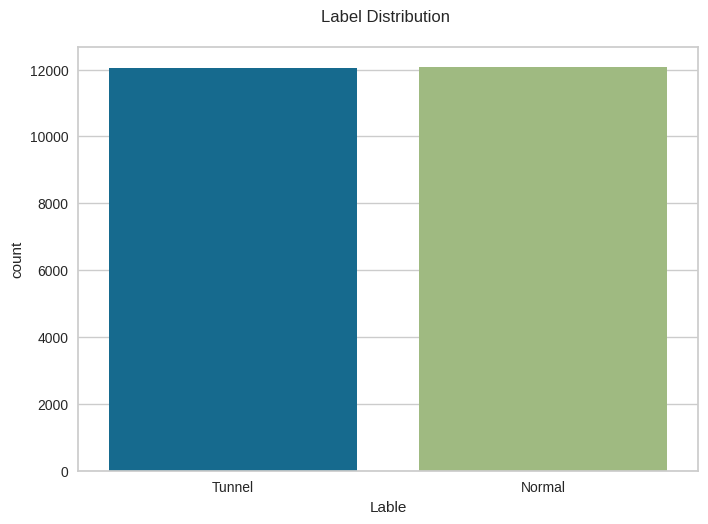

In [53]:
sns.countplot(x="Lable",data=df2)
plt.title("Label Distribution \n ")
plt.savefig("image.png")
plt.show()

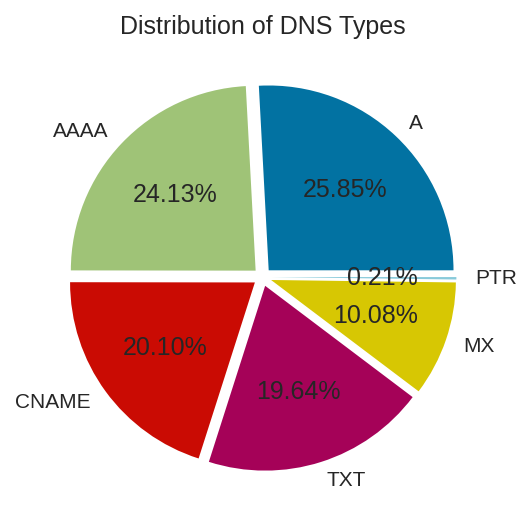

In [54]:
plt.figure(figsize=(4,4),dpi=150)
x=df2.DNS_type.value_counts()
plt.pie(x,labels=x.index,autopct="%.2f%%",explode=(.05,.05,.05,.05,.05,.05))
plt.title("Distribution of DNS Types")
plt.savefig("image1.png")
plt.show()

In [55]:
profile = ProfileReport(df2, title="Profiling Report")

In [56]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
clf = setup(df2, target = 'Lable', session_id = 123,index=False)

In [59]:
best = compare_models()

In [60]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [61]:
# check the final params of best model
best.get_params()

{'priors': None, 'var_smoothing': 1e-09}

#### var_smoothing
A Gaussian curve can serve as a "low pass" filter, allowing only the samples close to its mean to "pass." In the context of Naive Bayes, assuming a Gaussian distribution is essentially giving more weights to the samples closer to the distribution mean. This might or might not be appropriate depending if what you want to predict follows a normal distribution.

The variable, var_smoothing, artificially adds a user-defined value to the distribution's variance (whose default value is derived from the training data set). This essentially widens (or "smooths") the curve and accounts for more samples that are further away from the distribution mean.

In [62]:
pred_holdout = predict_model(best)

In [63]:
# save model
# save_model(best, 'best_pipeline')

In [64]:
df2.head()

Timestamp Protocol            Source_IP        Destination_IP  \
0  18:58:15.801177       IP  192.168.3.136.51531  192.168.3.13.domain:   
1  18:58:15.802048       IP  192.168.3.13.domain  192.168.3.136.51531:   
2  18:58:16.197885       IP   192.168.3.13.39576    dns.google.domain:   
4  18:58:16.210722       IP   192.168.3.13.34517    dns.google.domain:   
6  18:58:16.805995       IP  192.168.3.136.51531  192.168.3.13.domain:   

  Identification_no DNS_type                                    DNS_info  \
0            45828+    CNAME  dnscat.60d201f876f3ac26f0d131003afbac0ee3.   
1             45828    CNAME  dnscat.acb201f876cc2d09230bd1ffff199bc5d2.   
2            21832+      PTR                  13.3.168.192.in-addr.arpa.   
4            37842+      PTR                 136.3.168.192.in-addr.arpa.   
6            59536+      TXT  dnscat.511c01f87681d44363bc4f003be0953e96.   

   DNS_Response_Len   Lable  
0                59  Tunnel  
1               114  Tunnel  
2                43  Tunnel  
4                44  Tunnel  
6                59  Tunnel

In [65]:
df2=df2.drop(["Timestamp","Protocol","Source_IP","Destination_IP", "Identification_no"],axis=1)

In [66]:
df2.tail()

DNS_type                                   DNS_info  DNS_Response_Len  \
52772        A  client-teamviewer-com.trafficmanager.net.                58   
20932        A                      upp.itunes.apple.com.                38   
37326     AAAA            fedex.com.ssl.d2.sc.omtrdc.net.                48   
20102        A                               aimtell.com.                29   
14465        A                        sandbox.google.com.                36   

        Lable  
52772  Normal  
20932  Normal  
37326  Normal  
20102  Normal  
14465  Normal

In [80]:
df2.shape

(24124, 4)

In [82]:
df2.duplicated().sum()

0

In [81]:
df2.drop_duplicates(inplace=True)

In [83]:
profile = ProfileReport(df2, title="Profiling Report")

In [84]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [87]:
from pycaret.classification import *
clf = setup(df2, target = 'Lable', session_id = 123,index=False)

In [88]:
best = compare_models()

In [89]:
best.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [90]:
pred_holdout = predict_model(best)

In [93]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [94]:
# save model
save_model(best, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['DNS_Response_Len'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_val...
                                                               verbose=0))),
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['DNS_info'],
                                     transformer